In [1]:
import torch
#from torchviz import make_dot
from torchvision import datasets
from torch import optim
import matplotlib.pyplot as plt
import torch.nn as nn
import numpy as np
import pandas as pd
from torch.utils.data import Dataset,DataLoader, TensorDataset
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, auc
import requests
#import cv2


device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [2]:
device

'cpu'

In [3]:
df = pd.read_csv('train.csv')
df.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [4]:
df.target.value_counts()

target
0    179902
1     20098
Name: count, dtype: int64

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

x = df.drop(['target', 'ID_code'] , axis=1)   
y = df['target']

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

lr = LogisticRegression(random_state=42, max_iter=2000) 
lr.fit(x_scaled,y)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,2000
,multi_class,'deprecated'


In [6]:
y.value_counts(normalize=True)

target
0    0.89951
1    0.10049
Name: proportion, dtype: float64

In [7]:
#scale
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size= 0.2,
                                                    random_state= 42,
                                                    stratify= y )
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [15]:
type(x_train)

numpy.ndarray

In [ ]:
torch.manual_seed(13)
x_train_tensor = torch.as_tensor(x_train).float()
y_train_tensor = torch.as_tensor(y_train.values.reshape(-1, 1)).float()

x_val_tensor = torch.as_tensor(x_test).float()
y_val_tensor = torch.as_tensor(y_test.values.reshape(-1, 1)).float()


In [10]:
class CustomDataset(Dataset):
    def __init__(self, data, target):
        self.data = torch.tensor(data, dtype=torch.float32)
        self.target = torch.tensor(target, dtype=torch.float32)

    def __getitem__(self, index):
        return self.data[index], self.target[index]

    def __len__(self):
        return len(self.data)


In [ ]:
train_dataset = TensorDataset(x_train_tensor,y_train_tensor)
val_dataset = TensorDataset(x_val_tensor,y_val_tensor)

batch_size = 32
train_loader = DataLoader(train_dataset,
                          batch_size=batch_size,
                          shuffle= True)
test_loader = DataLoader(val_dataset,
                         batch_size=batch_size,
                         shuffle= False)

Epoch 1/50, Train Loss: 0.2601, Validation Loss: 0.2492
Epoch 2/50, Train Loss: 0.2458, Validation Loss: 0.2443
Epoch 3/50, Train Loss: 0.2438, Validation Loss: 0.2447
Epoch 4/50, Train Loss: 0.2431, Validation Loss: 0.2446
Epoch 5/50, Train Loss: 0.2427, Validation Loss: 0.2444
Epoch 6/50, Train Loss: 0.2425, Validation Loss: 0.2473
Epoch 7/50, Train Loss: 0.2421, Validation Loss: 0.2447
Epoch 8/50, Train Loss: 0.2419, Validation Loss: 0.2432
Epoch 9/50, Train Loss: 0.2412, Validation Loss: 0.2439
Epoch 10/50, Train Loss: 0.2411, Validation Loss: 0.2514
Epoch 11/50, Train Loss: 0.2411, Validation Loss: 0.2428
Epoch 12/50, Train Loss: 0.2410, Validation Loss: 0.2443
Epoch 13/50, Train Loss: 0.2409, Validation Loss: 0.2470
Epoch 14/50, Train Loss: 0.2404, Validation Loss: 0.2448
Epoch 15/50, Train Loss: 0.2409, Validation Loss: 0.2452
Epoch 16/50, Train Loss: 0.2406, Validation Loss: 0.2430
Epoch 17/50, Train Loss: 0.2406, Validation Loss: 0.2426
Epoch 18/50, Train Loss: 0.2405, Validat

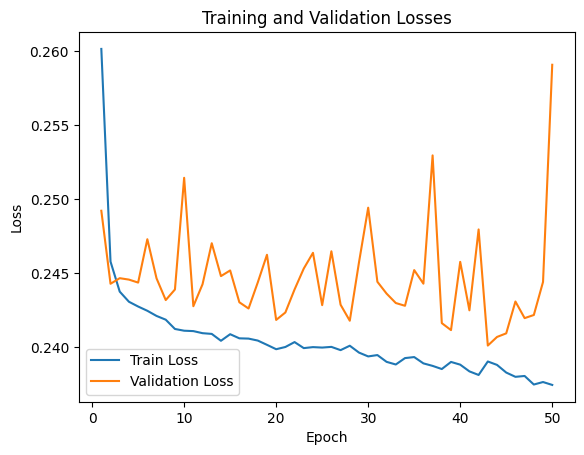

In [ ]:
torch.manual_seed(13)
input_dim = 200

class ManualClassification(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, 5)
        self.fc2 = nn.Linear(5, 3)
        self.fc3 = nn.Linear(3, 1)  
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)  
        x = self.sigmoid(x)  
        return x

criterion = nn.CrossEntropyLoss() 
lr = 0.01
model = ManualClassification()
model.to(device)
optimizer = torch.optim.Adam(model.parameters(),lr=lr)
criterion = nn.BCELoss()

def train(model, dataloader, optimizer,criterion):
    model.train()
    total_loss = 0.0
    for inputs, targets in dataloader:
        optimizer.zero_grad()
        inputs, targets = inputs.to(device), targets.to(device)  
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(dataloader)

def validate(model, dataloader, criterion):
    model.eval()
    total_loss = 0.0
    with torch.no_grad():
        for inputs, targets in dataloader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            total_loss += loss.item()
    return total_loss / len(dataloader)

n_epochs = 50
train_losses = []
test_losses = []
for epoch in range(n_epochs):
    train_loss = train (model,train_loader,optimizer,criterion)
    train_losses.append(train_loss)
    test_loss = validate(model,test_loader,criterion)
    test_losses.append(test_loss)
    print(f"Epoch {epoch+1}/{n_epochs}, Train Loss: {train_loss:.4f}, Validation Loss: {test_loss:.4f}")

plt.plot(range(1, n_epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, n_epochs+1), test_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Losses')
plt.legend()
plt.show()

Epoch 1/50, Train Loss: 0.2503, Validation Loss: 0.2382
Epoch 2/50, Train Loss: 0.2422, Validation Loss: 0.2361
Epoch 3/50, Train Loss: 0.2408, Validation Loss: 0.2380
Epoch 4/50, Train Loss: 0.2398, Validation Loss: 0.2357
Epoch 5/50, Train Loss: 0.2390, Validation Loss: 0.2357
Epoch 6/50, Train Loss: 0.2384, Validation Loss: 0.2357
Epoch 7/50, Train Loss: 0.2384, Validation Loss: 0.2349
Epoch 8/50, Train Loss: 0.2383, Validation Loss: 0.2370
Epoch 9/50, Train Loss: 0.2377, Validation Loss: 0.2353
Epoch 10/50, Train Loss: 0.2378, Validation Loss: 0.2363
Epoch 11/50, Train Loss: 0.2370, Validation Loss: 0.2355
Epoch 12/50, Train Loss: 0.2375, Validation Loss: 0.2358
Epoch 13/50, Train Loss: 0.2372, Validation Loss: 0.2362
Epoch 14/50, Train Loss: 0.2368, Validation Loss: 0.2358
Epoch 15/50, Train Loss: 0.2370, Validation Loss: 0.2369
Epoch 16/50, Train Loss: 0.2364, Validation Loss: 0.2358
Epoch 17/50, Train Loss: 0.2367, Validation Loss: 0.2351
Epoch 18/50, Train Loss: 0.2365, Validat

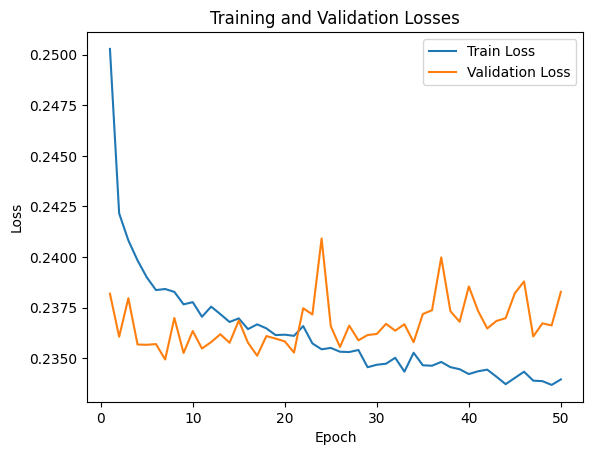

In [ ]:
torch.manual_seed(13)
input_dim = 200

class ManualClassification(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, 5)
        self.bn1 = nn.BatchNorm1d(5)
        self.fc2 = nn.Linear(5, 3)
        self.bn2 = nn.BatchNorm1d(3)
        self.fc3 = nn.Linear(3, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        x = self.relu(self.bn1(self.fc1(x)))
        x = self.relu(self.bn2(self.fc2(x)))
        x = self.fc3(x)
        x = self.sigmoid(x)
        return x
    

criterion = nn.CrossEntropyLoss()  
lr = 0.01
model = ManualClassification()
model.to(device)
optimizer = torch.optim.Adam(model.parameters(),lr=lr)
criterion = nn.BCELoss()

def train(model, dataloader, optimizer,criterion):
    model.train()
    total_loss = 0.0
    for inputs, targets in dataloader:
        optimizer.zero_grad()
        inputs, targets = inputs.to(device), targets.to(device)  
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(dataloader)

def validate(model, dataloader, criterion):
    model.eval()
    total_loss = 0.0
    with torch.no_grad():
        for inputs, targets in dataloader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            total_loss += loss.item()
    return total_loss / len(dataloader)

n_epochs = 50
train_losses = []
test_losses = []
for epoch in range(n_epochs):
    train_loss = train (model,train_loader,optimizer,criterion)
    train_losses.append(train_loss)
    test_loss = validate(model,test_loader,criterion)
    test_losses.append(test_loss)
    print(f"Epoch {epoch+1}/{n_epochs}, Train Loss: {train_loss:.4f}, Validation Loss: {test_loss:.4f}")

plt.plot(range(1, n_epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, n_epochs+1), test_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Losses')
plt.legend()
plt.show()

In [22]:
train_dataset = TensorDataset(x_train_tensor,y_train_tensor)
val_dataset = TensorDataset(x_val_tensor,y_val_tensor)

batch_size = 128
train_loader = DataLoader(train_dataset,
                          batch_size=batch_size,
                          shuffle= True)
test_loader = DataLoader(val_dataset,
                         batch_size=batch_size,
                         shuffle= False)

Epoch 1/50, Train Loss: 0.6277, Validation Loss: 0.5501
Epoch 2/50, Train Loss: 0.4832, Validation Loss: 0.4275
Epoch 3/50, Train Loss: 0.3818, Validation Loss: 0.3486
Epoch 4/50, Train Loss: 0.3209, Validation Loss: 0.3033
Epoch 5/50, Train Loss: 0.2864, Validation Loss: 0.2798
Epoch 6/50, Train Loss: 0.2671, Validation Loss: 0.2673
Epoch 7/50, Train Loss: 0.2578, Validation Loss: 0.2603
Epoch 8/50, Train Loss: 0.2524, Validation Loss: 0.2578
Epoch 9/50, Train Loss: 0.2493, Validation Loss: 0.2555
Epoch 10/50, Train Loss: 0.2472, Validation Loss: 0.2535
Epoch 11/50, Train Loss: 0.2454, Validation Loss: 0.2517
Epoch 12/50, Train Loss: 0.2439, Validation Loss: 0.2504
Epoch 13/50, Train Loss: 0.2427, Validation Loss: 0.2493
Epoch 14/50, Train Loss: 0.2415, Validation Loss: 0.2481
Epoch 15/50, Train Loss: 0.2408, Validation Loss: 0.2469
Epoch 16/50, Train Loss: 0.2396, Validation Loss: 0.2459
Epoch 17/50, Train Loss: 0.2390, Validation Loss: 0.2449
Epoch 18/50, Train Loss: 0.2383, Validat

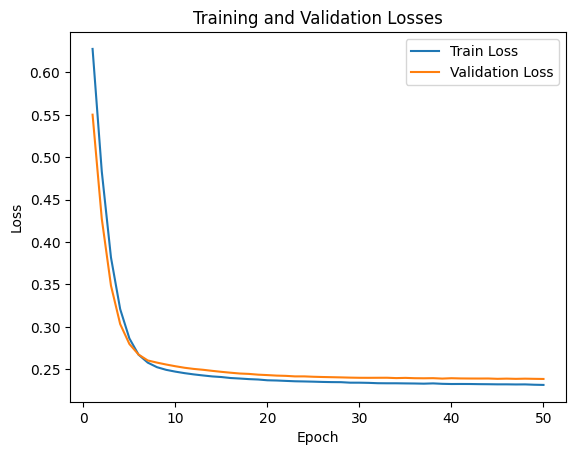

In [ ]:
torch.manual_seed(13)
input_dim = 200

class ManualClassification(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, 5)
        self.bn1 = nn.BatchNorm1d(5)
        self.fc2 = nn.Linear(5, 3)
        self.bn2 = nn.BatchNorm1d(3)
        self.fc3 = nn.Linear(3, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        x = self.relu(self.bn1(self.fc1(x)))
        x = self.relu(self.bn2(self.fc2(x)))
        x = self.fc3(x)
        x = self.sigmoid(x)
        return x
    

criterion = nn.CrossEntropyLoss()  
lr = 0.0001
model = ManualClassification()
model.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=1e-5)
criterion = nn.BCELoss()

def train(model, dataloader, optimizer,criterion):
    model.train()
    total_loss = 0.0
    for inputs, targets in dataloader:
        optimizer.zero_grad()
        inputs, targets = inputs.to(device), targets.to(device)  
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(dataloader)

def validate(model, dataloader, criterion):
    model.eval()
    total_loss = 0.0
    with torch.no_grad():
        for inputs, targets in dataloader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            total_loss += loss.item()
    return total_loss / len(dataloader)

n_epochs = 50
train_losses = []
test_losses = []
for epoch in range(n_epochs):
    train_loss = train (model,train_loader,optimizer,criterion)
    train_losses.append(train_loss)
    test_loss = validate(model,test_loader,criterion)
    test_losses.append(test_loss)
    print(f"Epoch {epoch+1}/{n_epochs}, Train Loss: {train_loss:.4f}, Validation Loss: {test_loss:.4f}")

plt.plot(range(1, n_epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, n_epochs+1), test_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Losses')
plt.legend()
plt.show()

Epoch 1/70, Train Loss: 0.6277, Validation Loss: 0.5501
Epoch 2/70, Train Loss: 0.4832, Validation Loss: 0.4275
Epoch 3/70, Train Loss: 0.3818, Validation Loss: 0.3486
Epoch 4/70, Train Loss: 0.3209, Validation Loss: 0.3033
Epoch 5/70, Train Loss: 0.2864, Validation Loss: 0.2798
Epoch 6/70, Train Loss: 0.2671, Validation Loss: 0.2673
Epoch 7/70, Train Loss: 0.2578, Validation Loss: 0.2603
Epoch 8/70, Train Loss: 0.2524, Validation Loss: 0.2578
Epoch 9/70, Train Loss: 0.2493, Validation Loss: 0.2555
Epoch 10/70, Train Loss: 0.2472, Validation Loss: 0.2535
Epoch 11/70, Train Loss: 0.2454, Validation Loss: 0.2517
Epoch 12/70, Train Loss: 0.2439, Validation Loss: 0.2504
Epoch 13/70, Train Loss: 0.2427, Validation Loss: 0.2493
Epoch 14/70, Train Loss: 0.2415, Validation Loss: 0.2481
Epoch 15/70, Train Loss: 0.2408, Validation Loss: 0.2469
Epoch 16/70, Train Loss: 0.2396, Validation Loss: 0.2459
Epoch 17/70, Train Loss: 0.2390, Validation Loss: 0.2449
Epoch 18/70, Train Loss: 0.2383, Validat

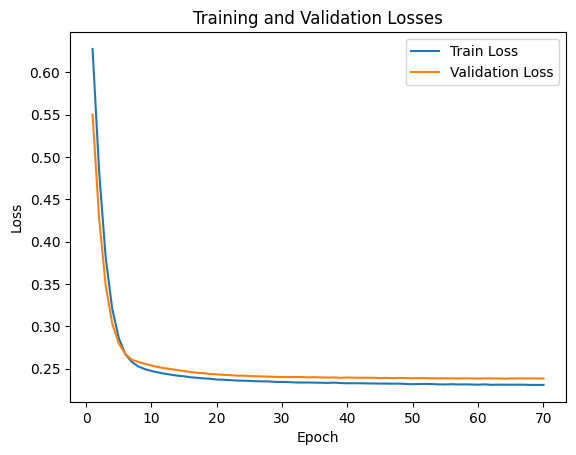

In [ ]:
torch.manual_seed(13)
input_dim = 200

class ManualClassification(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, 5)
        self.bn1 = nn.BatchNorm1d(5)
        self.fc2 = nn.Linear(5, 3)
        self.bn2 = nn.BatchNorm1d(3)
        self.fc3 = nn.Linear(3, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        x = self.relu(self.bn1(self.fc1(x)))
        x = self.relu(self.bn2(self.fc2(x)))
        x = self.fc3(x)
        x = self.sigmoid(x)
        return x
    

criterion = nn.CrossEntropyLoss()  
lr = 0.0001
model = ManualClassification()
model.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=1e-5)
criterion = nn.BCELoss()

def train(model, dataloader, optimizer,criterion):
    model.train()
    total_loss = 0.0
    for inputs, targets in dataloader:
        optimizer.zero_grad()
        inputs, targets = inputs.to(device), targets.to(device)  
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(dataloader)

def validate(model, dataloader, criterion):
    model.eval()
    total_loss = 0.0
    with torch.no_grad():
        for inputs, targets in dataloader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            total_loss += loss.item()
    return total_loss / len(dataloader)

n_epochs = 70
train_losses = []
test_losses = []
for epoch in range(n_epochs):
    train_loss = train (model,train_loader,optimizer,criterion)
    train_losses.append(train_loss)
    test_loss = validate(model,test_loader,criterion)
    test_losses.append(test_loss)
    print(f"Epoch {epoch+1}/{n_epochs}, Train Loss: {train_loss:.4f}, Validation Loss: {test_loss:.4f}")

plt.plot(range(1, n_epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, n_epochs+1), test_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Losses')
plt.legend()
plt.show()

In [ ]:

model.eval()
all_predictions = []
all_targets = []

with torch.no_grad():
    for inputs, targets in test_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = model(inputs)
        predictions = (outputs > 0.5).float()
        all_predictions.extend(predictions.cpu().numpy().flatten())
        all_targets.extend(targets.cpu().numpy().flatten())

accuracy = accuracy_score(all_targets, all_predictions)
precision = precision_score(all_targets, all_predictions, zero_division=0)
recall = recall_score(all_targets, all_predictions, zero_division=0)
f1 = f1_score(all_targets, all_predictions, zero_division=0)
cm = confusion_matrix(all_targets, all_predictions)

print(" نتایج نهایی ارزیابی:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}") 
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Confusion Matrix:\n{cm}")

 نتایج نهایی ارزیابی:
Accuracy: 0.9119
Precision: 0.6509
Recall: 0.2667
F1-Score: 0.3783
Confusion Matrix:
[[35405   575]
 [ 2948  1072]]
